In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5557,s5558,Movie,Jo Koy: Live from Seattle,Shannon Hartman,Jo Koy,United States,"March 28, 2017",2017,TV-MA,63 min,Stand-Up Comedy,Between raising a teenage boy and growing up w...
5093,s5094,Movie,Mustang Island,Craig Elrod,"Macon Blair, Lee Eddy, John Merriman, Byron Br...",United States,"January 2, 2018",2017,TV-14,86 min,"Comedies, Dramas, Independent Movies","After being dumped on New Year's Eve, Bill pur..."
2122,s2123,TV Show,Stranger,NaN,"Seung-woo Cho, Doona Bae, Joon-hyuk Lee, Kyeon...",South Korea,"August 16, 2020",2020,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, Korean...","With the help of a gutsy female detective, a p..."
7485,s7486,TV Show,Monkey Planet,NaN,George McGavin,United Kingdom,"March 31, 2017",2014,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Join zoologist Dr. George McGavin for a fascin...
7150,s7151,Movie,Junebug,Phil Morrison,"Amy Adams, Embeth Davidtz, Ben McKenzie, Aless...",United States,"March 1, 2019",2005,R,107 min,"Comedies, Dramas, Independent Movies",When a big-city art dealer travels to North Ca...
1364,s1365,Movie,Zathura,Jon Favreau,"Jonah Bobo, Josh Hutcherson, Dax Shepard, Kris...",United States,"February 1, 2021",2005,PG,101 min,"Children & Family Movies, Sci-Fi & Fantasy",A mysterious game sends two brothers flying in...
6184,s6185,Movie,Arisan 2,Nia Dinata,"Surya Saputra, Cut Mini Theo, Tora Sudiro",Indonesia,"September 15, 2018",2011,TV-14,113 min,"Comedies, Dramas, International Movies",A group of friends reunites for a vacation ami...
6186,s6187,Movie,Arthur Christmas,Sarah Smith,"James McAvoy, Hugh Laurie, Bill Nighy, Jim Bro...","United Kingdom, United States","January 1, 2020",2011,PG,98 min,"Children & Family Movies, Comedies",At Santa Claus's super-secret toy-making facil...
3016,s3017,Movie,Hop,Tim Hill,"James Marsden, Russell Brand, Kaley Cuoco, Han...","United States, France, Japan","January 16, 2020",2011,PG,95 min,"Children & Family Movies, Comedies",A jobless slacker finds himself beyond busy af...
730,s731,Movie,Cobra Kai - The Afterparty,NaN,"David Spade, London Hughes, Fortune Feimster",NaN,"June 12, 2021",2021,TV-MA,34 min,Movies,"Ralph Macchio, William Zabka and more from the..."


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna("Unknown")

In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [9]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


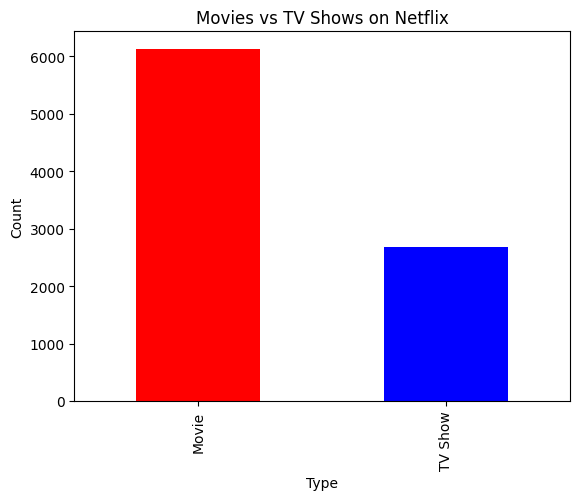

In [10]:
df['type'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [11]:
top_countries = df['country'].value_counts().head(10)
top_countries

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


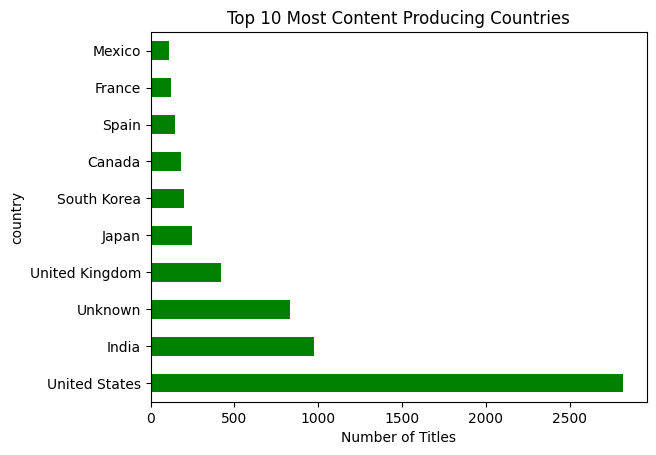

In [12]:
top_countries.plot(kind="barh" ,color="green")
plt.title("Top 10 Most Content Producing Countries")
plt.xlabel("Number of Titles")
plt.show()

In [13]:
all_genre = df['listed_in'].str.split(',')

In [25]:
all_genre_exploded = all_genre.explode()
top_genres = all_genre_exploded.value_counts().head(10)

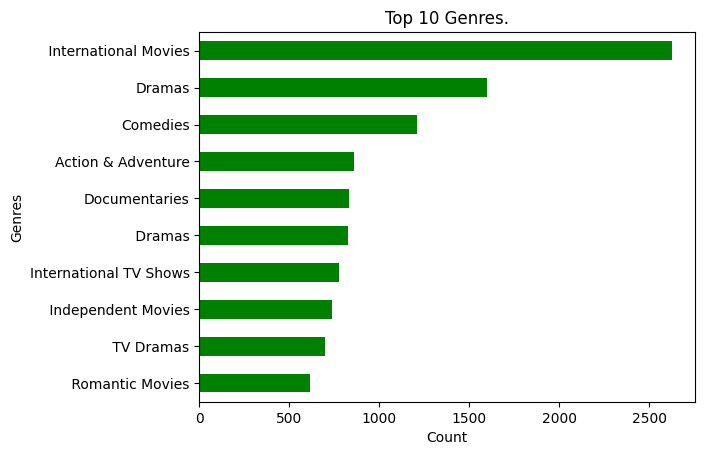

In [33]:
top_genres.sort_values(ascending=True).plot(kind="barh" ,color="green")
plt.title("Top 10 Genres.")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

In [15]:
highest_release = df['release_year'].value_counts().sort_values(ascending=False)
highest_release

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


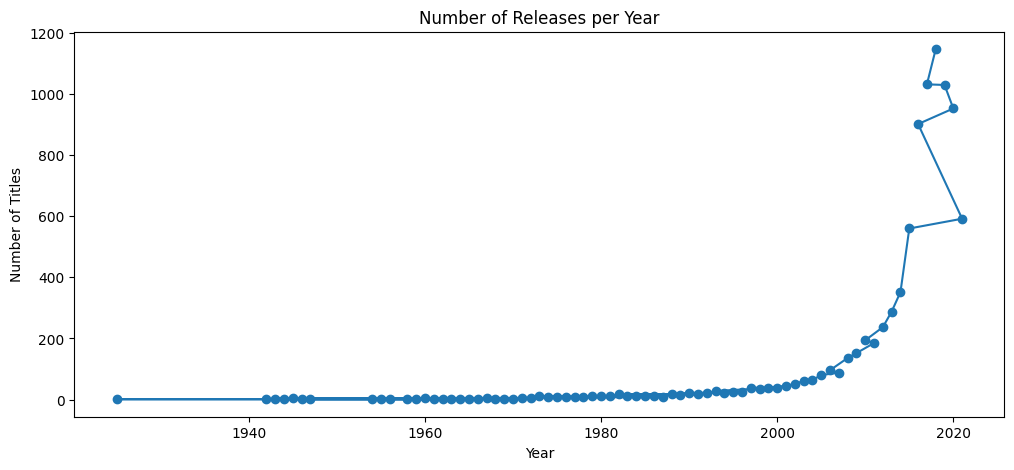

In [16]:
plt.figure(figsize=(12,5))
plt.plot(highest_release.index, highest_release.values, marker='o')
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


In [17]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
import numpy as np

mask = df['rating'].str.contains('min', na=False)
df.loc[mask & df['duration'].isna(), 'duration'] = df.loc[mask & df['duration'].isna(), 'rating']
df.loc[mask, 'rating'] = np.nan

In [19]:
df['rating'].value_counts()

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


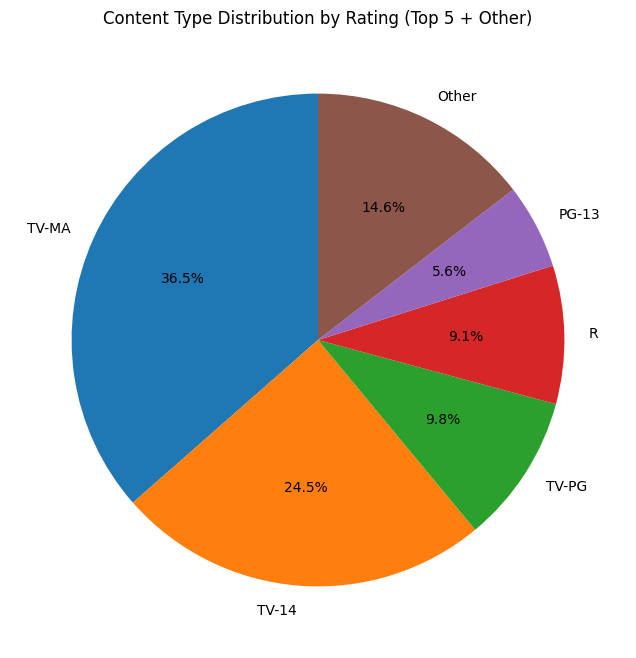

In [20]:
rating_counts = df['rating'].value_counts()

top5 = rating_counts[:5]
other = rating_counts[5:].sum()

rating_pie = pd.concat([top5, pd.Series({'Other': other})])

plt.figure(figsize=(8,8))
plt.pie(rating_pie, labels=rating_pie.index, autopct='%1.1f%%', startangle=90)
plt.title("Content Type Distribution by Rating (Top 5 + Other)")
plt.show()


In [21]:
df['director'].value_counts().head(10)

,count
director,
Unknown,2634
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12


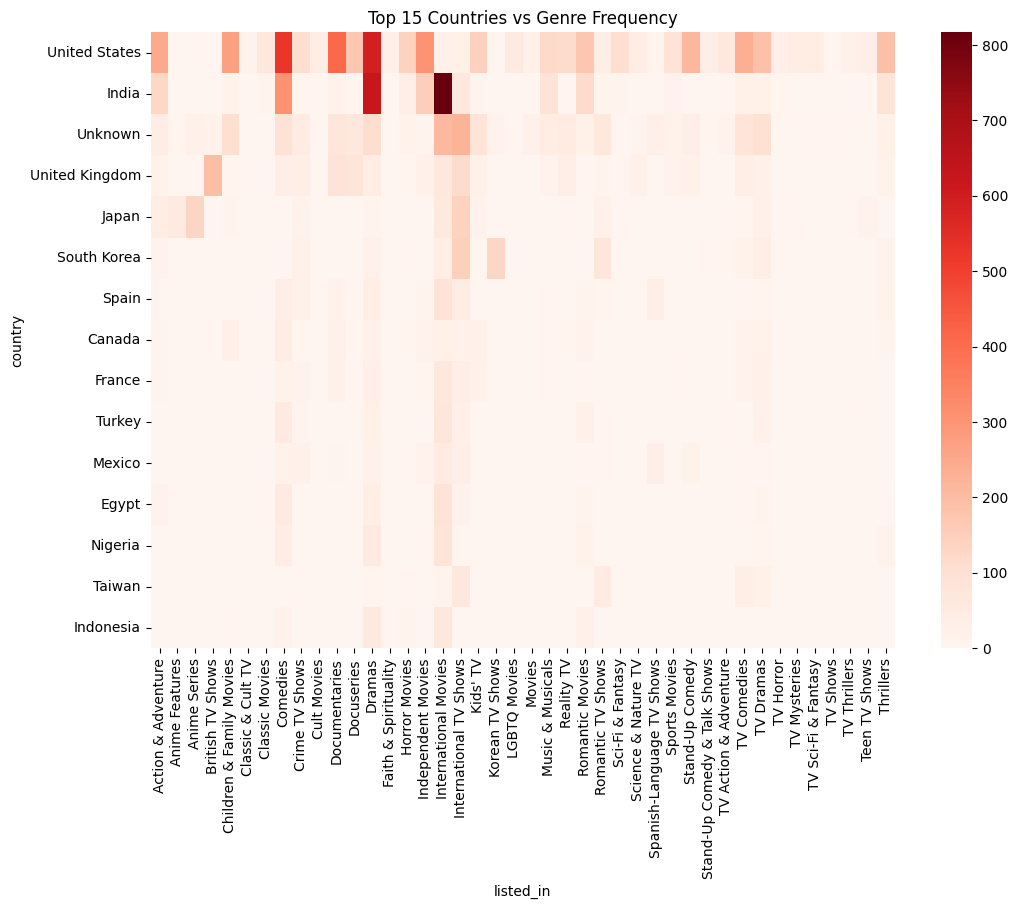

In [22]:
df_genre = df.assign(listed_in = df['listed_in'].str.split(',')).explode('listed_in')
df_genre['listed_in'] = df_genre['listed_in'].str.strip()

country_genre = pd.crosstab(df_genre['country'], df_genre['listed_in'])

top_countries = df_genre['country'].value_counts().head(15).index

country_genre_top = country_genre.loc[top_countries]
plt.figure(figsize=(12,8))
sns.heatmap(country_genre_top, cmap="Reds")
plt.title("Top 15 Countries vs Genre Frequency")
plt.show()


In [23]:
df['duration'].sample(10)

,duration
6221,75 min
348,91 min
1294,1 Season
3826,1 Season
1375,2 Seasons
4975,150 min
5784,78 min
3900,1 Season
4075,121 min
2600,5 Seasons


In [ ]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.replace(' min','').astype(float)

In [ ]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['duration_seasons'] = tv_shows['duration'].str.replace(' Season','').str.replace('s','').astype(float)

In [ ]:
average_duration_movie = movies['duration_min'].mean()
print(average_duration_movie)

99.57718668407311


In [ ]:
average_duration_season = tv_shows['duration_seasons'].mean()
print(average_duration_season)

1.764947683109118


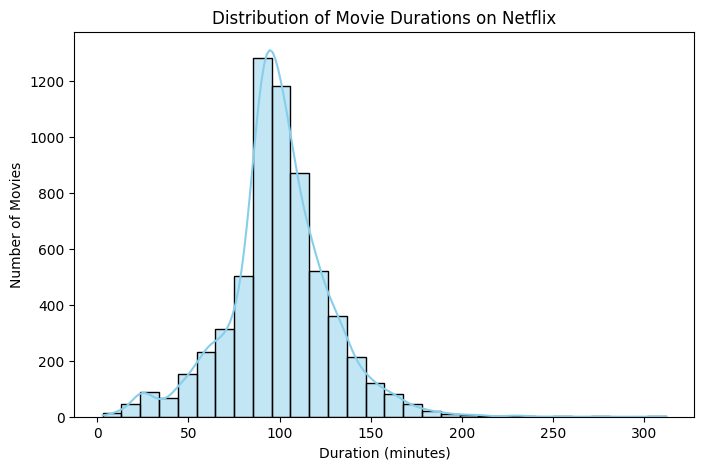

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_min'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

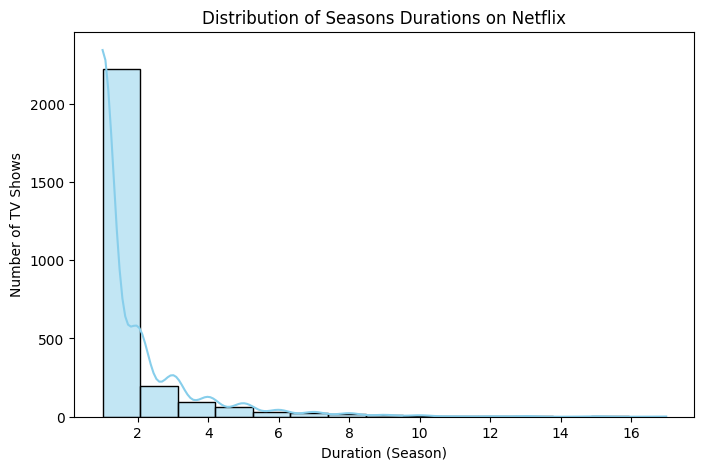

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(tv_shows['duration_seasons'], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Seasons Durations on Netflix")
plt.xlabel("Duration (Season)")
plt.ylabel("Number of TV Shows")
plt.show()

In [ ]:
# From the Netflix dataset, here’s what we found:
# ✅ Netflix has far more Movies than TV Shows.
# ✅ Dramas & Comedies are the most common genres.
# ✅ The US & India are top content producers.
# ✅ Netflix content additions spiked post-2015.
# ✅ TV Shows are getting shorter in terms of seasons.